# IMU Data

blah ...

In [1]:
import cv2
import numpy as np
from collections import namedtuple
import time
import pickle
from math import pi
from ins_nav import AHRS
from matplotlib import pyplot as plt
from squaternion import quat2euler, Quaternion

### Get Data

In [53]:
Data_ts = namedtuple('Data_ts', 'data timestamp')
data = pickle.load(open("data/imu-still.pickle", "rb"))

# Still

In [54]:
accel = [x[0][0] for x in data['imu']]
mags = [x[0][1] for x in data['imu']]
gyros = [x[0][2] for x in data['imu']]
imutime = [x[1] for x in data['imu']]

In [55]:
def std(data):
    x = [x[0] for x in data]
    y = [x[1] for x in data]
    z = [x[2] for x in data]
    plt.figure()
    plt.plot(data)
    plt.grid(True)
    print('Mean:')
    print(' x {}'.format(np.mean(x)))
    print(' y {}'.format(np.mean(y)))
    print(' z {}'.format(np.mean(z)))
    print('Standard Dev:')
    print(' x {}'.format(np.std(x)))
    print(' y {}'.format(np.std(y)))
    print(' z {}'.format(np.std(z)))

Accel -----------------
Mean:
 x 0.028026083999999996
 y -0.024934116
 z 1.02393014
Standard Dev:
 x 0.0008612778000993641
 y 0.000635959635939263
 z 0.0009841332493112874
Mags ------------------
Mean:
 x -32.6913
 y -9.921700000000001
 z 14.2512
Standard Dev:
 x 0.5092684066383855
 y 0.541534034018177
 z 0.7351588671845019
Gyros -----------------
Mean:
 x 0.4826015625
 y -0.9850078125
 z -0.19296875
Standard Dev:
 x 0.2811804895656922
 y 0.21360701412157232
 z 0.17664371749283217


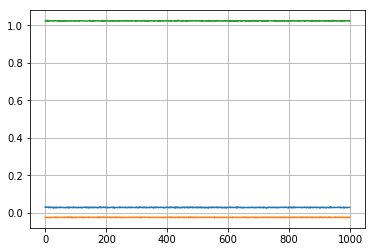

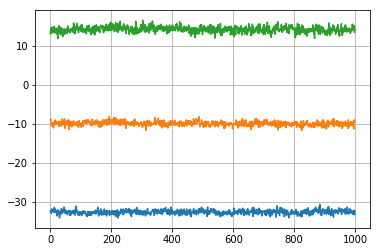

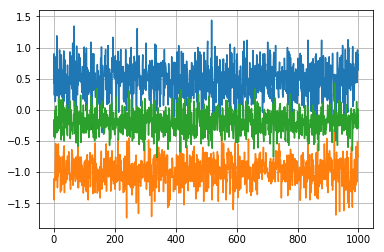

In [56]:
print('Accel -----------------')
std(accel)
print('Mags ------------------')
std(mags)
print('Gyros -----------------')
std(gyros)

In [45]:
hz=11.5740740e-6 # Hz, earth rotation
hz*2*pi/pi*180

0.00416666664

In [11]:
ahrs = AHRS()

In [18]:
save = []
ot = 0
q = Quaternion(1,0,0,0)

for a,m,g,t in zip(accel, mags, gyros,imutime):
    #q = ahrs.updateAGM(a,m,g,1,t-ot)
    q = ahrs.updateAG(a,g,.1,t-ot)
    o = quat2euler(*q, degrees=True)
    save.append(o)
    ot = t

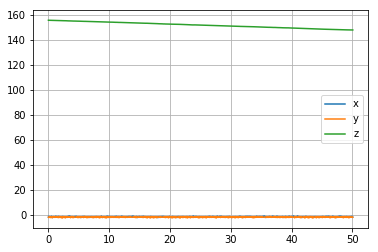

In [19]:
plt.plot(imutime, [x[0] for x in save], label='x')
plt.plot(imutime, [x[1] for x in save], label='y')
plt.plot(imutime, [x[2] for x in save], label='z')
plt.legend()
plt.grid(True)
plt.show()

# Move

In [20]:
data = pickle.load(open("data/imu-move.pickle", "rb"))

In [21]:
accel = [x[0][0] for x in data['imu']]
mags = [x[0][1] for x in data['imu']]
gyros = [x[0][2] for x in data['imu']]
imutime = [x[1] for x in data['imu']]

In [36]:
save = []
ot = 0
q = Quaternion(1,0,0,0)

for a,m,g,t in zip(accel, mags, gyros,imutime):
    #q = ahrs.updateAGM(a,m,g,.01,t-ot)
    q = ahrs.updateAG(a,g,.1,t-ot)
    o = quat2euler(*q, degrees=True)
    save.append(o)
    ot = t

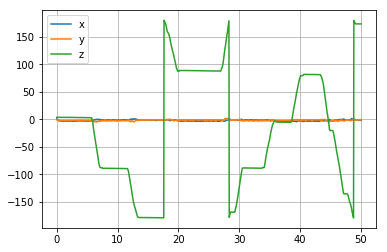

In [37]:
plt.plot(imutime, [x[0] for x in save], label='x')
plt.plot(imutime, [x[1] for x in save], label='y')
plt.plot(imutime, [x[2] for x in save], label='z')
plt.legend()
plt.grid(True)
plt.show()